In [1]:
import warnings
warnings.filterwarnings("ignore")

# Overview
### Purpose
This code imports essential libraries for data analysis, numerical computation, and visualization in Python. 
These libraries form the foundational tools for most data science and machine learning tasks.

### Functionality
- **pandas**: Used for data manipulation and analysis.
- **numpy**: Provides support for numerical operations, including working with arrays and performing mathematical computations.
- **matplotlib.pyplot**: A foundational library for creating static, animated, and interactive visualizations.
- **seaborn**: Built on top of Matplotlib, it simplifies creating visually appealing and informative statistical graphics.
- **sqlite3**: Facilitates interaction with SQLite databases, allowing for efficient storage and retrieval of data.

### Key Considerations
- Ensure these libraries are installed in your environment using pip (e.g., `pip install pandas numpy matplotlib seaborn`).
- sqlite3 is included in Python's standard library, so no additional installation is needed.
- This code is a standard setup for data analysis tasks and does not perform any specific operations by itself.

### Inputs and Outputs
- **Inputs**: None explicitly. These libraries will be used with datasets and numerical inputs later in your project.
- **Outputs**: None explicitly. The imported libraries enable functionalities for data manipulation, visualization, and database management.

In [2]:
# Importing libraries
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np  # numpy provides support for large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations
import seaborn as sns  # seaborn simplifies the creation of statistical visualizations


Procedure for establishing a connection to the SQLite database:
1. Import the sqlite3 library (already imported above).
2. Use the `sqlite3.connect` method with the database file name as an argument.
3. Store the connection object in a variable (e.g., `engine`).
4. Use this connection object to interact with the database, such as executing SQL queries or retrieving data.

Establishing a connection to the SQLite database
Replace 'zomato_rawdata.sqlite' with your database file's name if needed.

In [3]:
import sqlite3 # sqlite3 is used to interact with SQLite databases

In [4]:
engine = sqlite3.connect('zomato_rawdata.sqlite') # Creates a connection to the SQLite database

In [5]:
# Using the SQLite database connection to load data into a pandas DataFrame
# Querying all records from the 'Users' table in the database
# Replace 'Users' with the actual table name in your database if different
df = pd.read_sql_query('SELECT * FROM Users', engine)  # Reads data from the SQLite database into a pandas DataFrame


In [6]:
# Checking the shape of the DataFrame
# This provides the number of rows and columns in the DataFrame as a tuple (rows, columns)
df.shape  # Outputs the dimensions of the DataFrame

(51717, 18)

In [7]:
# Displaying the first few rows of the DataFrame
# This provides a quick overview of the data, including column names and sample values
df.head()  # Outputs the first 5 rows of the DataFrame by default

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning Stage
The purpose of this stage is to ensure the dataset is cleaned and ready for analysis.
This involves identifying and handling missing values, duplicates, or inconsistencies.

1. Checking for missing values in the dataset
This provides insight into the number of null or NaN entries in each column.

In [8]:
missing_values = df.isnull().sum()  # Outputs the count of missing values per column

In [9]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
# Removing commas from the 'approx_cost(for two people)' column to ensure numerical operations can be performed
# This converts strings with commas (e.g., '1,200') into clean numbers
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')  # Removes commas


In [11]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [12]:
# Converting the cleaned column to a float type for numerical analysis
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)  # Converts to float


In [13]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [14]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
# Cleaning and preparing the 'rate' column
# Removing unnecessary characters such as '/5', 'NEW', or '-' using regex
df['rate'] = df['rate'].str.replace(r' ?/5|NEW|-', '', regex=True)  # Cleans the 'rate' column by removing unwanted characters


In [16]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', None,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [17]:
df['rate'] = df['rate'].replace('', np.nan)

In [18]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', None,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [19]:
df['rate'] = df['rate'].astype(float)

In [20]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
df['rate'].isnull().sum()

10052

In [22]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [23]:
df['rest_type'].isnull().sum()

227

In [24]:
data = df.dropna(subset=['rest_type'])

In [25]:
quickbites = data[data['rest_type'].str.contains('Quick Bites')]

In [26]:
quickbites['dish_liked'].head()

3                                           Masala Dosa
23                                      Pasta, Iced Tea
26                                                 None
31    Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34    Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
Name: dish_liked, dtype: object

In [27]:
quickbites['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [28]:
all_dishes = quickbites['dish_liked'].str.lower().str.cat()

In [29]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from wordcloud import WordCloud  # wordcloud is used to create word clouds for visual analysis

In [31]:
# Creating a Word Cloud from the text data
# Assuming 'all_dishes' is a variable containing text data (e.g., concatenated food item names from a DataFrame)
clouded = WordCloud().generate(all_dishes)  # Generates a word cloud from the text data


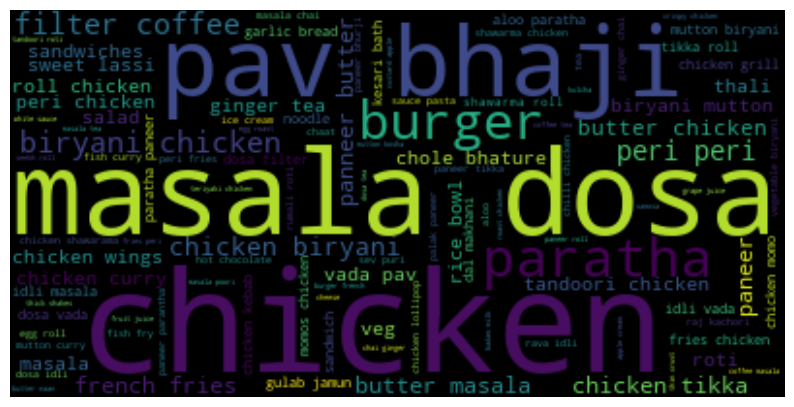

In [32]:
# Visualizing the Word Cloud
# The word cloud provides a visual representation of the most frequently mentioned words in the text data.

# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Display the generated word cloud
plt.imshow(clouded, interpolation='bilinear')

# Turn off the axes for better aesthetics
plt.axis('off')

# Render the visualization
plt.show()

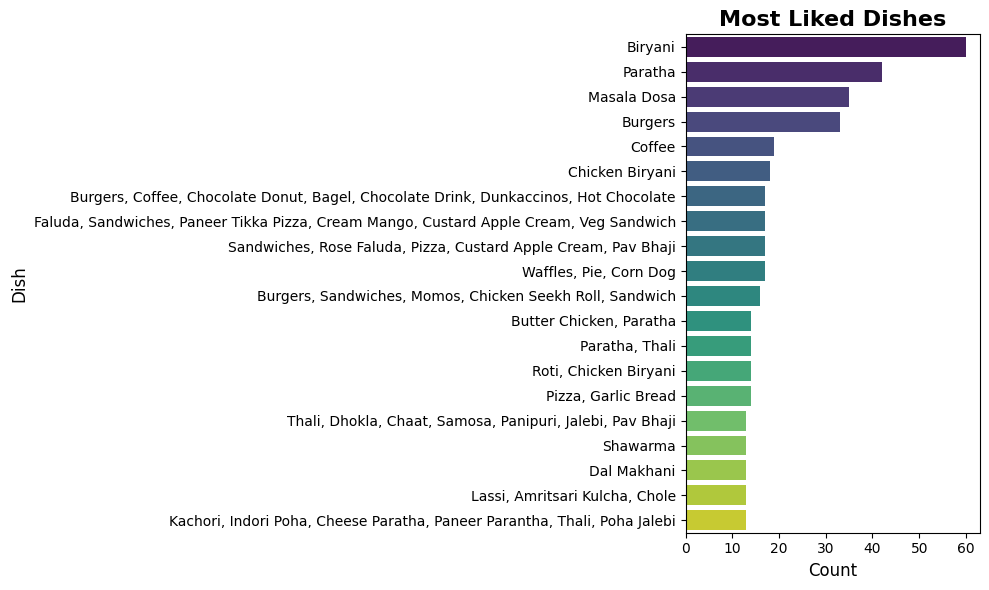

In [33]:
# Count the occurrences and sort values
dish_counts = quickbites['dish_liked'].value_counts().head(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dish_counts.values, 
    y=dish_counts.index, 
    palette='viridis'
)

# Add title and labels
plt.title('Most Liked Dishes', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dish', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [35]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [36]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [37]:
df[df.rate.isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [38]:
df.rate[72]

nan

In [39]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [40]:
import ast

In [41]:

def get_rate(review):
   
    try:
        # Convert the string to a Python object (a list of tuples)
        review_list = ast.literal_eval(review)
        
        # Ensure the object is a non-empty list
        if not isinstance(review_list, list) or len(review_list) == 0:
            return None
        
        # Get the first tuple from the list
        first_entry = review_list[0]
        
        # Ensure the first tuple has a rating string in the expected format
        if len(first_entry) > 0 and 'Rated' in first_entry[0]:
            # Extract and clean the rating
            rating_str = first_entry[0].replace('Rated', '').strip()
            return float(rating_str)
        
        # Return None if the rating could not be extracted
        return None
    except Exception as error:
        # Print an error message for debugging
        print(f"Error processing review: {review} - {error}")
        return None


In [42]:
df['reviews_list'].apply(get_rate)

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list, Length: 51717, dtype: float64

In [43]:
get_rate(df['reviews_list'][72])

4.0

In [44]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [45]:
df['Reviews_Rate'] = df['reviews_list'].apply(get_rate)

In [46]:
df['rate'].fillna(df['Reviews_Rate'],inplace=True)

In [47]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            6474
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
Reviews_Rate                    7595
dtype: int64

In [48]:
updateDF = df.drop(['dish_liked','Reviews_Rate'], axis = 1)

In [49]:
updateDF.isnull().sum()

index                             0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           6474
votes                             0
phone                          1208
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [50]:
updateDF.rate.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [51]:
updateDF[updateDF.rate.isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",South Indian,400.0,[],[],Delivery,Banashankari
92,92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,South Indian,200.0,[],[],Delivery,Banashankari
107,107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,NaN,0,+91 9591504624,Banashankari,"Takeaway, Delivery",Beverages,250.0,[],[],Delivery,Banashankari
113,113,https://www.zomato.com/bangalore/dharwad-line-...,"Shop 25, 1st Cross, 50 Feet Main Road, Near BD...",Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,+91 9901539269,Banashankari,Dessert Parlor,Mithai,150.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,South Indian,200.0,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,"Biryani, Kebab",300.0,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,North Indian,400.0,[],[],Dine-out,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield


### Feature Engineering

In [52]:
# Feature Engineering Stage
# Feature engineering involves creating new features, transforming existing ones, or extracting important insights from raw data.
# This process enhances the dataset's ability to support analysis, visualization, and predictive modeling.

In [53]:
# Function to calculate the number of items (words) in a string column, separated by commas.
# This can be useful for analyzing the number of dishes, tags, or other comma-separated data.

def counter(row):
    """
    Count the number of items in a string separated by commas.
    
    Args:
        row (str): Input string with comma-separated items.
        
    Returns:
        int: The number of items in the string.
    """
    return len(row.split(','))  # Split the string by commas and return the total number of resulting items

In [54]:
# Feature Engineering Stage
# Creating new features by counting the number of items (comma-separated) in relevant columns.

# Count the number of cuisines listed for each restaurant
updateDF['cuisines_no'] = updateDF['cuisines'].astype(str).apply(counter)  # Applies the counter function to the 'cuisines' column

# Count the number of restaurant types associated with each restaurant
updateDF['types_no'] = updateDF['rest_type'].astype(str).apply(counter)  # Applies the counter function to the 'rest_type' column


In [55]:
updateDF.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),cuisines_no,types_no
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2


In [56]:
# Feature Engineering - Creating a Binary Classifier for Rating Based on a Standard Threshold
# This step creates a new feature 'class' that categorizes each restaurant's rate into two classes: high or low.

# Set the standard rating threshold
standard = 3.80  # Define a standard threshold for determining 'high' vs. 'low' ratings

# Apply a lambda function to categorize restaurants into two classes:
# 1 if the rating is greater than or equal to the threshold, else 0
updateDF['class'] = updateDF['rate'].apply(lambda x: 1 if float(x) >= standard else 0)  # Converts rating into binary classification


In [57]:
updateDF.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),cuisines_no,types_no,class
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1


In [58]:
updateDF.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'cuisines_no', 'types_no',
       'class'],
      dtype='object')

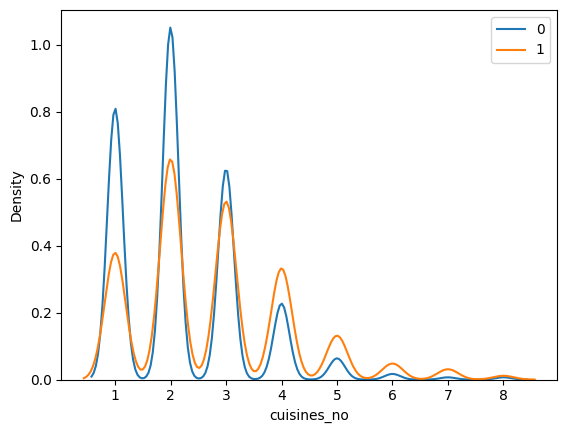

In [59]:
# Visualizing Distributions of 'Cuisines' Count Based on Binary Rating Classes
# This visualization uses seaborn's density plot to compare the distribution of 'cuisines_no' for two groups:
# - Class 0 (restaurants with a rating below the threshold).
# - Class 1 (restaurants with a rating at or above the threshold).

# Plotting the density distributions
sns.distplot(updateDF[updateDF['class'] == 0]['cuisines_no'], hist=False, label='0')  # Density plot for class 0
sns.distplot(updateDF[updateDF['class'] == 1]['cuisines_no'], hist=False, label='1')  # Density plot for class 1

# Adding legend to differentiate the two classes in the plot
plt.legend()  # Displays the legend to make the visualization informative
plt.show()  # Renders the plot


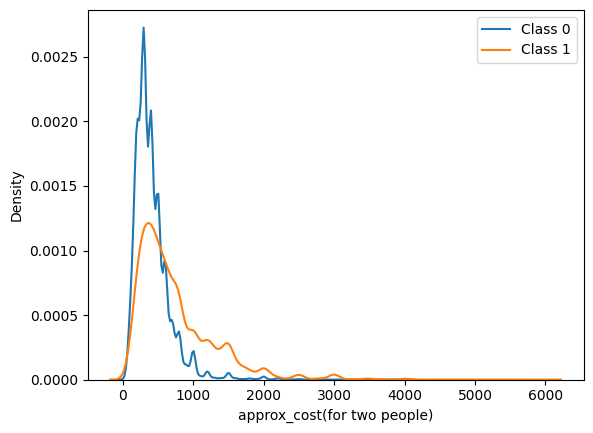

In [60]:
# Plotting the distribution of 'approx_cost(for two people)' for each class using sns.displot
sns.distplot(
    updateDF[updateDF['class'] == 0]['approx_cost(for two people)'], 
    hist=False, 
    label='Class 0'
)

sns.distplot(
    updateDF[updateDF['class'] == 1]['approx_cost(for two people)'], 
    hist=False, 
    label='Class 1'
)

# Adding legend to differentiate classes
plt.legend()
plt.show()


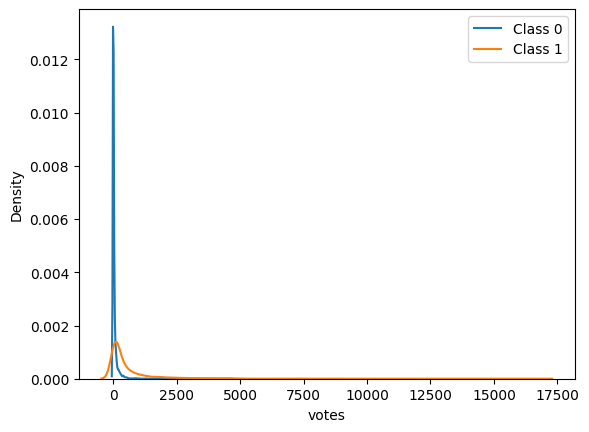

In [61]:
# Plotting the distribution of 'votes' for each class using sns.displot
sns.distplot(
    updateDF[updateDF['class'] == 0]['votes'], 
    hist=False, 
    label='Class 0'
)

sns.distplot(
    updateDF[updateDF['class'] == 1]['votes'], 
    hist=False, 
    label='Class 1'
)

# Adding legend and displaying the plot
plt.legend()
plt.show()


In [62]:
updateDF.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'cuisines_no', 'types_no',
       'class'],
      dtype='object')

In [63]:
# Data Cleaning - Drop rows with any missing values
updateDF = updateDF.dropna()  # Removes rows with NaN values to ensure data integrity


In [64]:
# Feature Selection - Select relevant features for further analysis and modeling
selected_features = ['book_table', 'online_order', 
                     'votes', 'location', 'rest_type',
                     'approx_cost(for two people)', 
                     'listed_in(type)', 'listed_in(city)', 
                     'class']


In [65]:
# Selecting only the relevant features from the cleaned DataFrame for analysis and further processing
data = updateDF[selected_features]  # Subsets the DataFrame to only include the specified features


In [66]:
data.shape

(44092, 9)

In [67]:
# Identify categorical features in the DataFrame
# This identifies columns with data type 'O' (object or string type), which are typically categorical variables
categorical_feat = [col for col in data.columns if data[col].dtype == 'O']  # Extracts categorical columns
categorical_feat  # Displays the list of identified categorical features


['book_table',
 'online_order',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [68]:
# Extract numerical features from the DataFrame
# This identifies columns that are not categorical by checking their data type
numerical_feat = [col for col in data.columns if data[col].dtype != 'O']  # Select numerical columns
numerical_feat  # Display the list of numerical features


['votes', 'approx_cost(for two people)', 'class']

In [69]:
for feature in categorical_feat:
    print(f'{feature} has total {data[feature].nunique()} unique features')

book_table has total 2 unique features
online_order has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [70]:
# Calculate the percentage of the top 5 most frequent restaurant types in the dataset
frequant_cat = data['rest_type'].value_counts().head() / len(data) * 100  # Calculates frequency percentages


In [71]:
frequant_cat

rest_type
Quick Bites       34.632133
Casual Dining     22.518824
Cafe               7.751973
Dessert Parlor     4.499682
Delivery           4.198040
Name: count, dtype: float64

In [72]:
frequant_cat.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery'], dtype='object', name='rest_type')

In [73]:
data[data['rest_type'].isin(frequant_cat.index)]

,book_table,online_order,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),class
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,No,Yes,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,No,Yes,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [74]:
# Replacing less frequent restaurant types with 'other' to generalize categories
replacement = 'other'  # Define the replacement string
data['rest_type'] = data['rest_type'].apply(lambda x: replacement if x not in frequant_cat.index else x)  # Replace infrequent types


In [75]:
# Calculate the percentage of the top 7 most common restaurant types
data['rest_type'].value_counts().head(7) / len(data) * 100


rest_type
Quick Bites       34.632133
other             26.399347
Casual Dining     22.518824
Cafe               7.751973
Dessert Parlor     4.499682
Delivery           4.198040
Name: count, dtype: float64

In [76]:
data['rest_type'].unique()

array(['Casual Dining', 'other', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor'], dtype=object)

In [77]:
data[['online_order',
           'book_table',
             'rest_type',
             'listed_in(type)']]

,online_order,book_table,rest_type,listed_in(type)
0,Yes,Yes,Casual Dining,Buffet
1,Yes,No,Casual Dining,Buffet
2,Yes,No,other,Buffet
3,No,No,Quick Bites,Buffet
4,No,No,Casual Dining,Buffet
...,...,...,...,...
51710,No,No,other,Pubs and bars
51711,No,No,other,Pubs and bars
51712,No,No,other,Pubs and bars
51715,No,Yes,other,Pubs and bars


In [78]:
data[['online_order', 'book_table', 'rest_type', 'listed_in(type)']].head()

,online_order,book_table,rest_type,listed_in(type)
0,Yes,Yes,Casual Dining,Buffet
1,Yes,No,Casual Dining,Buffet
2,Yes,No,other,Buffet
3,No,No,Quick Bites,Buffet
4,No,No,Casual Dining,Buffet


In [79]:
 
#for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    # Use pd.get_dummies to encode the column
    #encoded_col = pd.get_dummies(data[col], prefix=col, drop_first=True)
    
    # Ensure the result is integer (0 and 1)
    #encoded_col = encoded_col.astype(int)
    
    # Concatenate the encoded columns with the original dataframe
   #redata = pd.concat([data, encoded_col], axis=1)

In [80]:
x1 = pd.get_dummies(data['online_order'], prefix='online_order', drop_first=True)
# Ensure the result is integer (0 and 1)
x1 = x1.astype(int)
# Concatenate the encoded columns with the original dataframe
newdata = pd.concat([data, x1], axis=1)

x2 = pd.get_dummies(data['book_table'], prefix='book_table', drop_first=True)
# Ensure the result is integer (0 and 1)
x2 = x2.astype(int)
# Concatenate the encoded columns with the original dataframe
newdata = pd.concat([newdata, x2], axis=1)

x3 = pd.get_dummies(data['rest_type'], prefix='rest_type', drop_first=True)
# Ensure the result is integer (0 and 1)
x3 = x3.astype(int)
# Concatenate the encoded columns with the original dataframe
newdata = pd.concat([newdata, x3], axis=1)

x4 = pd.get_dummies(data['listed_in(type)'], prefix='listed_in(type)', drop_first=True)
# Ensure the result is integer (0 and 1)
x4 = x4.astype(int)
# Concatenate the encoded columns with the original dataframe
newdata = pd.concat([newdata, x4], axis=1)

In [81]:
newdata.head()

,book_table,online_order,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),class,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
1,No,Yes,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
2,No,Yes,918,Banashankari,other,800.0,Buffet,Banashankari,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
categorical_feat

['book_table',
 'online_order',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [83]:
dict_mean_location = newdata.groupby(['location'])['class'].mean().to_dict()

In [84]:
newdata['location'] = newdata['location'].map(dict_mean_location)

In [85]:
newdata['location']

0        0.480000
1        0.480000
2        0.480000
3        0.480000
4        0.523501
           ...   
51710    0.411494
51711    0.411494
51712    0.411494
51715    0.336957
51716    0.336957
Name: location, Length: 44092, dtype: float64

In [86]:
dict_mean_city = newdata.groupby(['listed_in(city)'])['class'].mean().to_dict()
newdata['listed_in(city)'] = newdata['listed_in(city)'].map(dict_mean_city)

In [87]:
newdata['listed_in(city)']

0        0.482260
1        0.482260
2        0.482260
3        0.482260
4        0.482260
           ...   
51710    0.413454
51711    0.413454
51712    0.413454
51715    0.413454
51716    0.413454
Name: listed_in(city), Length: 44092, dtype: float64

In [88]:
newdata.drop(['online_order', 'book_table', 'rest_type', 'listed_in(type)'], axis = 1, inplace = True)

In [89]:
newdata.head(2)

,votes,location,approx_cost(for two people),listed_in(city),class,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.48,800.0,0.48226,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.48,800.0,0.48226,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
import scipy.stats as stats

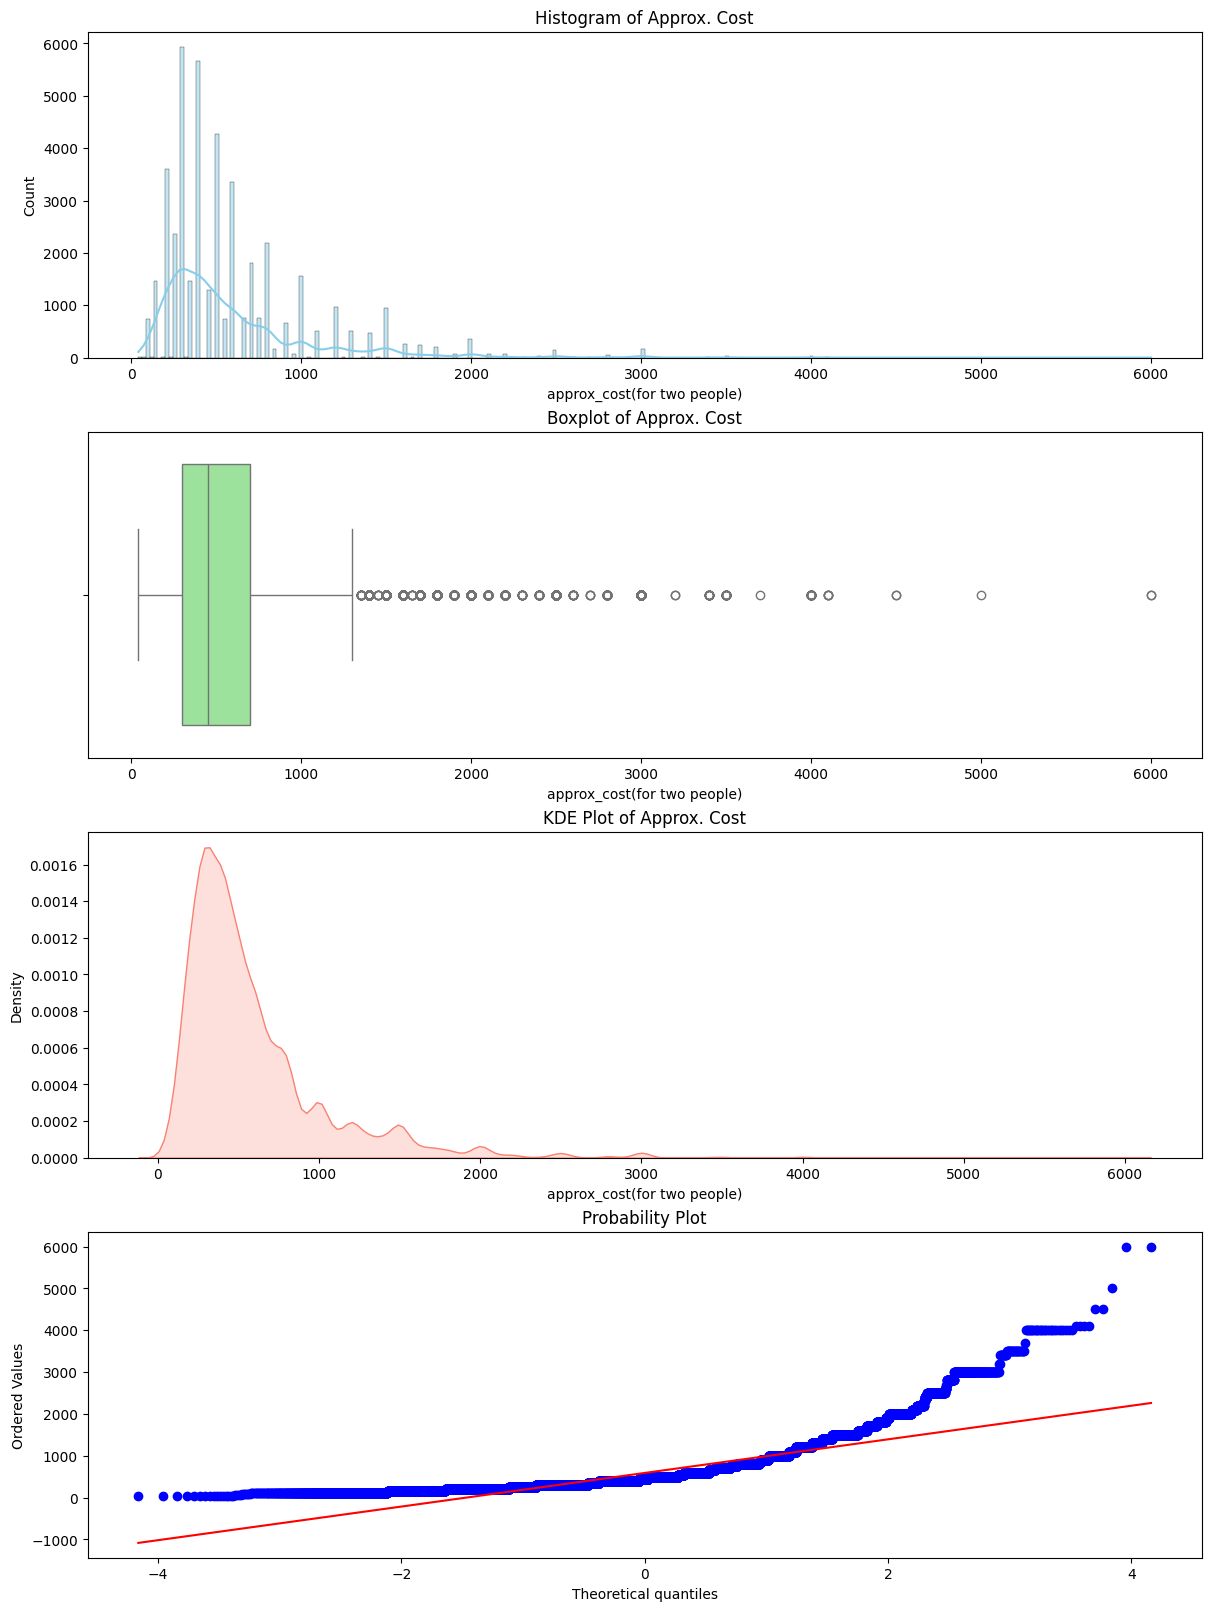

In [91]:
# Define the data column
data = newdata['approx_cost(for two people)']

# Set up the figure
fig, axes = plt.subplots(4, 1, figsize=(12, 16), constrained_layout=True)

# Plot 1: Histogram
sns.histplot(data, ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Approx. Cost")

# Plot 2: Boxplot
sns.boxplot(x=data, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Approx. Cost")

# Plot 3: Distribution Plot
sns.kdeplot(data, ax=axes[2], fill=True, color="salmon")
axes[2].set_title("KDE Plot of Approx. Cost")

# Plot 4: Probability Plot
stats.probplot(data, plot=axes[3])
axes[3].set_title("Probability Plot")

# Display the plots
plt.show()

In [92]:
np.log1p(newdata['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51710    6.803505
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 44092, dtype: float64

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

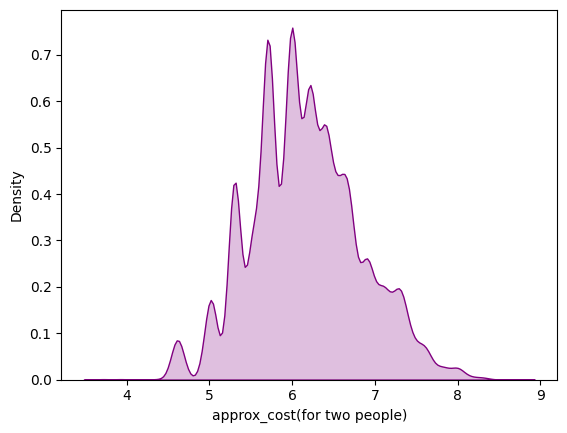

In [93]:
sns.kdeplot(np.log1p(newdata['approx_cost(for two people)']), fill=True, color="purple")

In [94]:
newdata['approx_cost(for two people)'] = np.log1p(newdata['approx_cost(for two people)'])

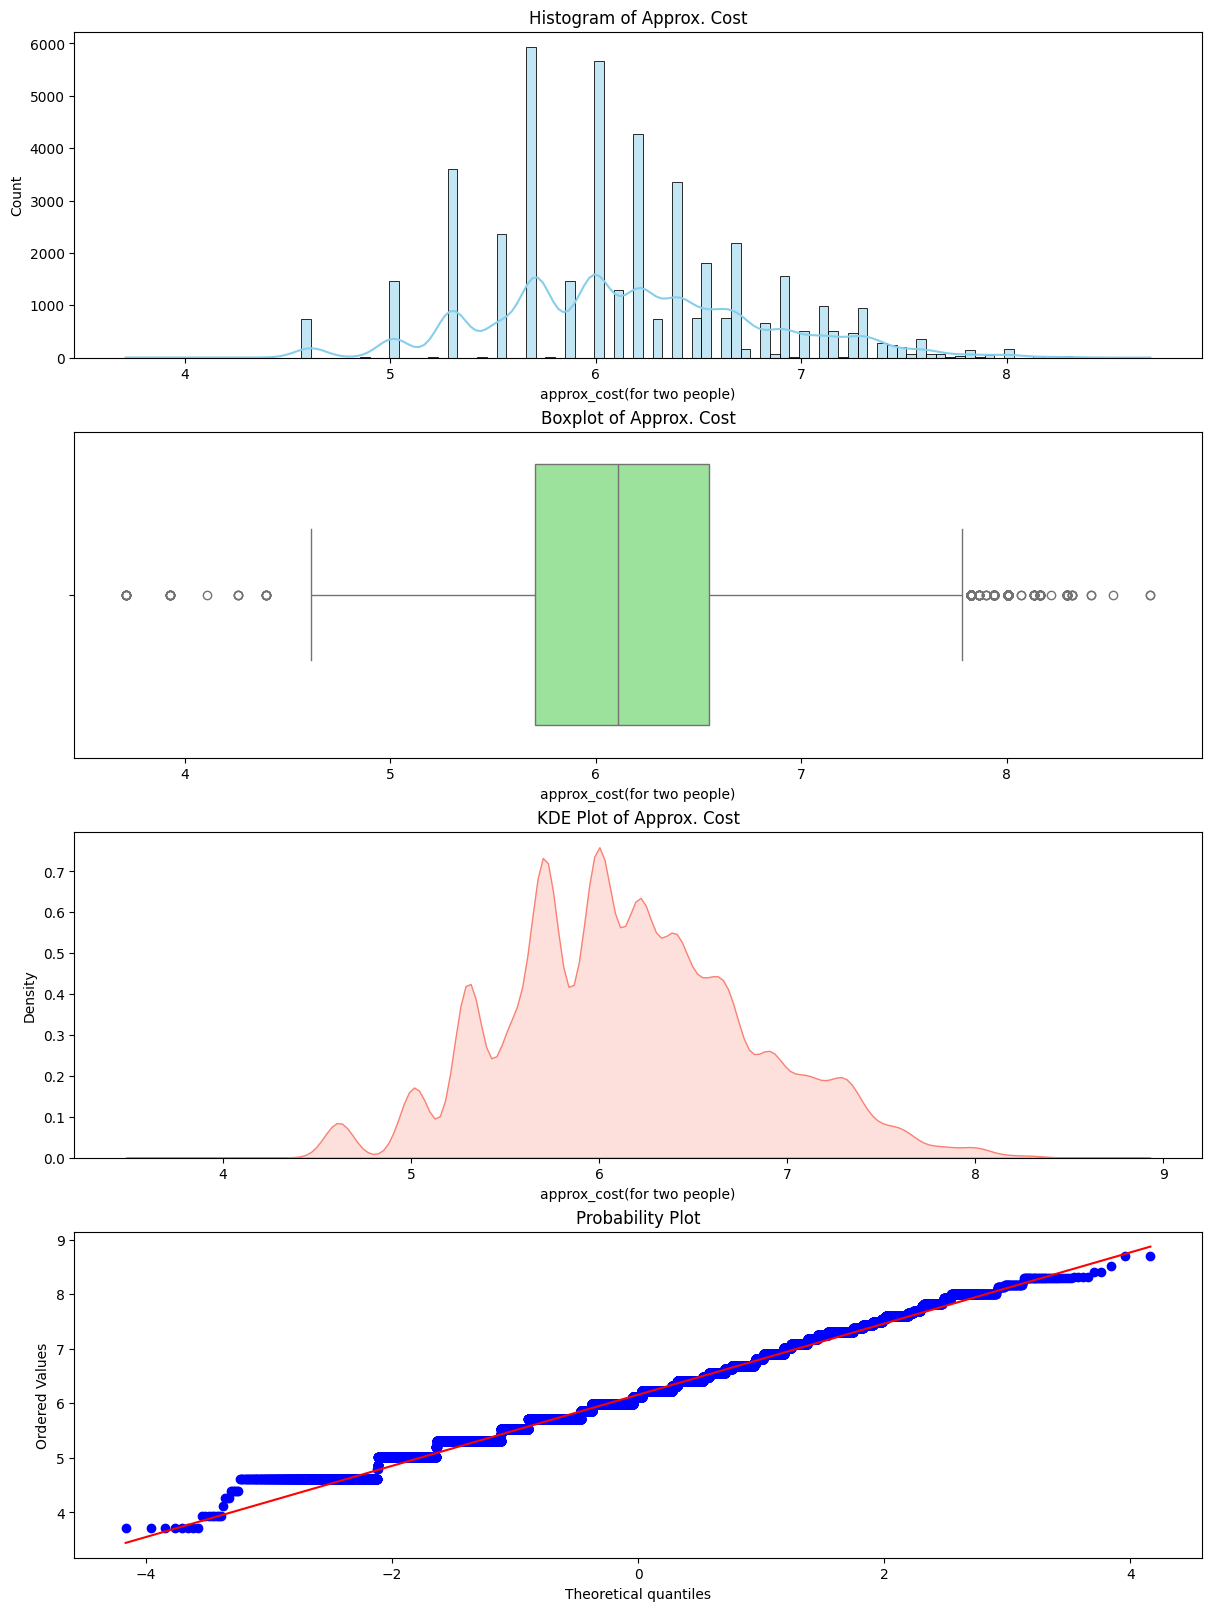

In [95]:
# Define the data column
data = newdata['approx_cost(for two people)']

# Set up the figure
fig, axes = plt.subplots(4, 1, figsize=(12, 16), constrained_layout=True)

# Plot 1: Histogram
sns.histplot(data, ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Approx. Cost")

# Plot 2: Boxplot
sns.boxplot(x=data, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Approx. Cost")

# Plot 3: Distribution Plot
sns.kdeplot(data, ax=axes[2], fill=True, color="salmon")
axes[2].set_title("KDE Plot of Approx. Cost")

# Plot 4: Probability Plot
stats.probplot(data, plot=axes[3])
axes[3].set_title("Probability Plot")

# Display the plots
plt.show()

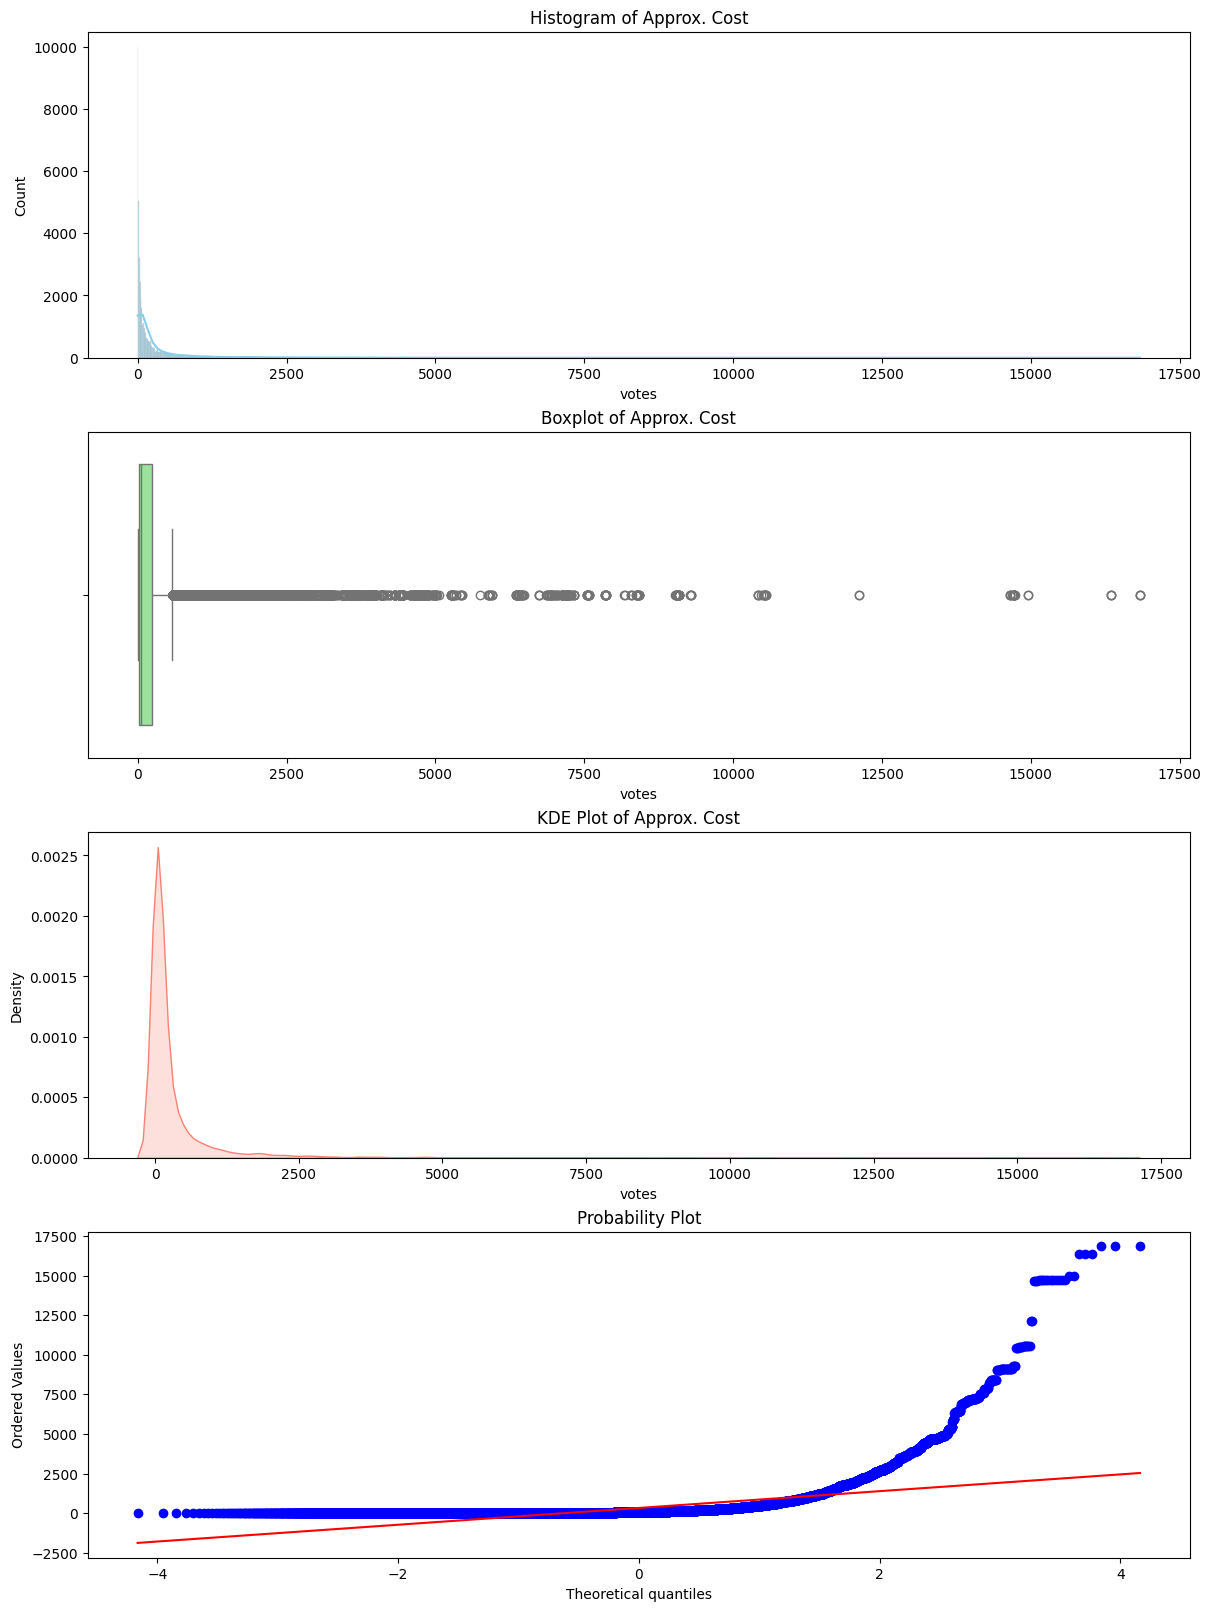

In [96]:
# Define the data column
data = newdata['votes']

# Set up the figure
fig, axes = plt.subplots(4, 1, figsize=(12, 16), constrained_layout=True)

# Plot 1: Histogram
sns.histplot(data, ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Approx. Cost")

# Plot 2: Boxplot
sns.boxplot(x=data, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Approx. Cost")

# Plot 3: Distribution Plot
sns.kdeplot(data, ax=axes[2], fill=True, color="salmon")
axes[2].set_title("KDE Plot of Approx. Cost")

# Plot 4: Probability Plot
stats.probplot(data, plot=axes[3])
axes[3].set_title("Probability Plot")

# Display the plots
plt.show()

In [97]:
newdata['votes'] = np.log1p(newdata['votes'])

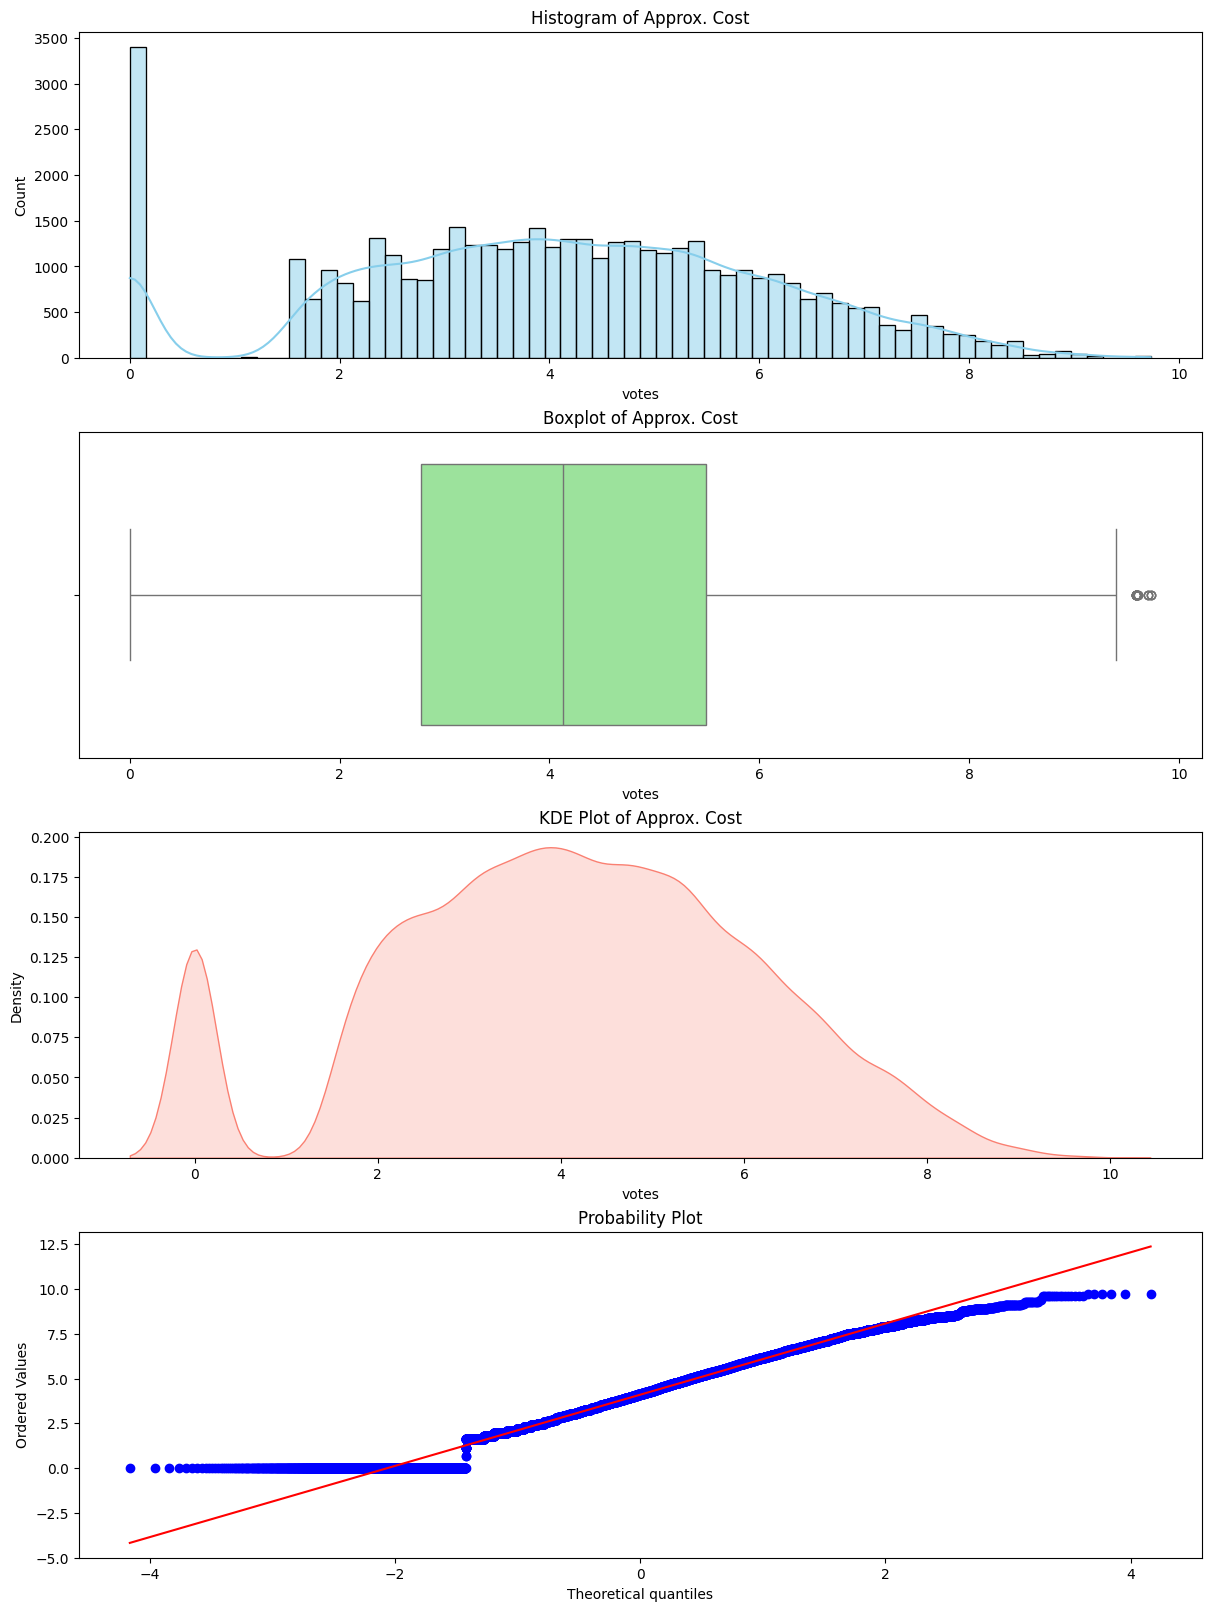

In [98]:
data = newdata['votes']

# Set up the figure
fig, axes = plt.subplots(4, 1, figsize=(12, 16), constrained_layout=True)

# Plot 1: Histogram
sns.histplot(data, ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Approx. Cost")

# Plot 2: Boxplot
sns.boxplot(x=data, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Approx. Cost")

# Plot 3: Distribution Plot
sns.kdeplot(data, ax=axes[2], fill=True, color="salmon")
axes[2].set_title("KDE Plot of Approx. Cost")

# Plot 4: Probability Plot
stats.probplot(data, plot=axes[3])
axes[3].set_title("Probability Plot")

# Display the plots
plt.show()

### Model Building:

In [99]:
X = newdata.drop('class', axis= 1)
Y = newdata['class']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [102]:
X_train.shape

(29541, 17)

**Imorting Random Forrest Classifier**

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
RF_model = RandomForestClassifier()

In [105]:
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

Making Prediction:

In [106]:
predictions = RF_model.predict(X_test)

**Model Evaluation** 

Tools for evaluation:
* accuracy_score
* confusion matrix

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
accuracy_score(predictions,Y_test)

0.9022060339495568

In [109]:
confusion_matrix(predictions,Y_test)

array([[6681,  755],
       [ 668, 6447]], dtype=int64)

**Model Optimization**

In [110]:
n_estimators = [int(x) for x in np.linspace(100, 1200, num=3)]

max_features = ["auto","sqrt"]

max_depth = [int(x) for x in np.linspace(5,30,num=3)]

min_samples_split = [5, 10, 100]

In [111]:
random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split
}

In [112]:
random_grid

{'n_estimators': [100, 650, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
estimator = RandomForestClassifier()

In [115]:
rf_random = RandomizedSearchCV(estimator=estimator, param_distributions = random_grid, cv=2, verbose=2, n_jobs = -1)

In [116]:
rf_random.fit(X_train,Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [117]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [118]:
random_op = RandomForestClassifier(max_depth=30, min_samples_split=5, max_features = 'sqrt', n_estimators = 650)

In [119]:
random_op.fit(X_train,Y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=650)

In [120]:
predictions_op = random_op.predict(X_test)

In [121]:
predictions_op

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [122]:
accuracy_score(predictions_op,Y_test)

0.8983575012026664

In [123]:
confusion_matrix(predictions_op,Y_test)

array([[6640,  770],
       [ 709, 6432]], dtype=int64)